In [1]:
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

# Removing features that very low in feature importance scale consistently.

In [59]:
df= pd.read_csv('Dataset_A3B_OH_343.csv')

In [60]:
df2=df.iloc[0:69,1:38]
df2 = df2.drop(columns=['M-At No.', 'M-M.P', 'M-Enth.fus', 'M-Elec.-ve', 'M-Surface.E', 
 'M-1st Ion E', 'M-Work F.', 'M-Elec.Aff', 'Density', 'M.P', 
 'Enth.fus', 'Enth.atom', 'Elec.-ve', 'Surface.E', 
 '1st Ion E', 'cova .radii', 'At.radii', 'Group', 'Work F.', 
 'Elec.Aff', 'OH_B.E']) 
df2

,M-At wt.,M-Density,M-B.P,M-Enth.atom,M-Enth.vap,M-Sp.ht Cap,M-cova .radii,M-At.radii,M-Group,M-Period,At No.,At wt.,B.P,Enth.vap,Sp.ht Cap,Period
0,196.96,19.30,3129,368,330,129.1,136,174,11,6,28,58.693,3186,378,445.0,4
1,196.96,19.30,3129,368,330,129.1,136,174,11,6,30,65.380,1180,119,388.0,4
2,196.96,19.30,3129,368,330,129.1,136,174,11,6,44,101.070,4423,580,238.0,5
3,196.96,19.30,3129,368,330,129.1,136,174,11,6,45,102.910,3968,495,240.0,5
4,196.96,19.30,3129,368,330,129.1,136,174,11,6,46,106.420,3236,380,240.0,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64,192.22,22.56,4701,671,560,131.0,137,180,9,6,75,186.210,5869,705,137.0,6
65,192.22,22.56,4701,671,560,131.0,137,180,9,6,76,190.230,5285,630,130.0,6
66,192.22,22.56,4701,671,560,131.0,137,180,9,6,78,195.080,4098,490,133.0,6
67,192.22,22.56,4701,671,560,131.0,137,180,9,6,79,196.960,3129,330,129.1,6


In [42]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df2)

In [43]:
pca = PCA(n_components=16)  # You can start by setting the number of components equal to the original feature set
pca.fit(X_scaled)

PCA(n_components=26)

In [44]:
X_pca = pca.fit_transform(X_scaled)  # Perform both fitting and transformation

# Retrieve cumulative explained variance
explained_variance = np.cumsum(pca.explained_variance_ratio_)

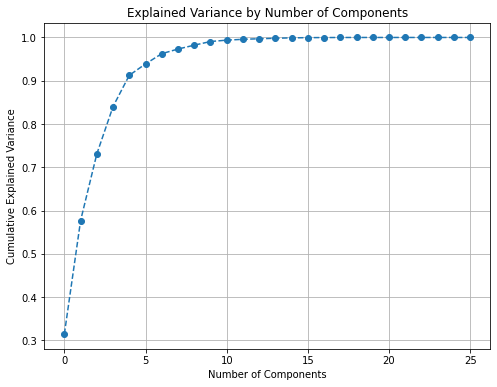

In [46]:
explained_variance = np.cumsum(pca.explained_variance_ratio_)
import matplotlib.pyplot as plt
# Plotting the cumulative explained variance
plt.figure(figsize=(8, 6))
plt.plot(range(0, 26), explained_variance, marker='o', linestyle='--')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Explained Variance by Number of Components')
plt.grid(True)
plt.show()

In [47]:
variance_threshold = 0.95
n_components = np.argmax(explained_variance >= variance_threshold) + 1
print(f"Number of components to explain {variance_threshold * 100}% variance: {n_components}")

Number of components to explain 95.0% variance: 7


In [48]:
s = pd.DataFrame(X_scaled)
s

,0,1,2,3,4,5,6,7,8,9,...,16,17,18,19,20,21,22,23,24,25
0,0.732023,0.268391,-1.091952,-1.338493,-1.371946,-0.617364,0.043781,0.098959,1.389425,0.634381,...,-0.236866,-0.028249,-0.117547,-0.130462,1.434508,0.276972,-0.176862,-0.984583,-1.234456,0.295111
1,0.732023,0.268391,-1.091952,-1.338493,-1.371946,-0.617364,0.043781,0.098959,1.389425,0.634381,...,-2.053345,-1.251163,-1.792164,-1.822392,0.978669,-1.447579,1.621545,-0.929972,-1.234456,-2.167296
2,0.732023,0.268391,-1.091952,-1.338493,-1.371946,-0.617364,0.043781,0.098959,1.389425,0.634381,...,0.883265,1.027057,1.116088,1.189113,-0.220907,1.014516,-0.462610,-0.711527,-0.034773,0.140124
3,0.732023,0.268391,-1.091952,-1.338493,-1.371946,-0.617364,0.043781,0.098959,1.389425,0.634381,...,0.471252,0.530442,0.580210,0.633847,-0.204913,0.342049,-0.361695,-0.220027,-0.034773,0.261796
4,0.732023,0.268391,-1.091952,-1.338493,-1.371946,-0.617364,0.043781,0.098959,1.389425,0.634381,...,-0.191590,-0.090326,-0.418978,-0.117397,-0.204913,-0.330417,0.538039,-0.438472,-0.034773,-0.549350
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64,0.643559,0.895495,0.777336,0.964327,0.749537,-0.600665,0.147950,0.624205,-0.527982,0.634381,...,2.192651,1.933379,1.808263,2.005682,-1.028622,0.981977,0.066396,1.090639,1.164909,-1.117152
65,0.643559,0.895495,0.777336,0.964327,0.749537,-0.600665,0.147950,0.624205,-0.527982,0.634381,...,1.663826,1.685071,1.880829,1.515741,-1.084602,1.394134,0.916204,-0.602305,1.164909,0.209651
66,0.643559,0.895495,0.777336,0.964327,0.749537,-0.600665,0.147950,0.624205,-0.527982,0.634381,...,0.588970,0.319381,0.630449,0.601184,-1.060611,-0.189416,1.234882,-0.165416,1.164909,1.646538
67,0.643559,0.895495,0.777336,0.964327,0.749537,-0.600665,0.147950,0.624205,-0.527982,0.634381,...,-0.288481,-0.611772,-0.469216,-0.444024,-1.091800,-1.002884,1.448715,-0.165416,1.164909,1.900021


In [49]:
pca=PCA(n_components=7)

In [50]:
pca.fit(X_scaled)

PCA(n_components=7)

In [51]:
x_pca=pca.transform(X_scaled)

In [52]:
x_pca.shape

(69, 7)

In [53]:
m = pd.DataFrame(x_pca)

In [55]:
m.columns = [f'Component_{i+1}' for i in range(7)]
m

,Component_1,Component_2,Component_3,Component_4,Component_5,Component_6,Component_7
0,-1.915967,-0.943504,-0.132418,-2.965627,-0.757080,1.676332,-0.241277
1,-3.982287,-2.807176,-1.550395,-1.175395,-1.854209,0.716056,2.623544
2,0.493640,1.231400,-0.433444,-3.414539,0.382485,1.612778,0.029696
3,-0.143799,0.748347,-1.020538,-2.591706,0.318120,1.735927,0.103422
4,-1.073746,-0.062325,-1.628189,-1.860067,-0.483666,1.302271,1.168488
...,...,...,...,...,...,...,...
64,5.035730,1.600901,-0.101576,-1.242366,1.994269,-1.164954,0.754653
65,5.000112,1.739273,-0.376168,-1.336674,-0.145249,-1.331400,-0.041956
66,3.448784,0.669767,-1.917558,0.701586,-1.046711,-0.725332,-0.921569
67,2.154261,-0.362528,-2.801696,1.947625,-1.679727,-0.625285,-0.861799


In [56]:
m.to_csv('PCA_add_7.csv', index=False)

In [57]:
n = 156
new_df = m.iloc[n:]  #Comp_1 and Comp_2 for Cu_Pred
L = pd.DataFrame(new_df)
L

,Component_1,Component_2,Component_3,Component_4,Component_5,Component_6,Component_7
